# MNIST and ConvNet

In [1]:
%%time
# ~3 mins

import tensorflow as tf
from tensorflow.keras.datasets import mnist


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >
                0.998):  # it actually never reaches this hight accuracy
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images,
                                     test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,
          training_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.1441 - accuracy: 0.9578 - val_loss: 0.0515 - val_accuracy: 0.9834
Epoch 2/10
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0410 - val_accuracy: 0.9862
Epoch 3/10
60000/60000 [==============================] - 21s 355us/sample - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 4/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0440 - val_accuracy: 0.9875
Epoch 5/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 6/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0572 - val_accuracy: 0.9853
Epoch 7/10
60000/60000 [====================

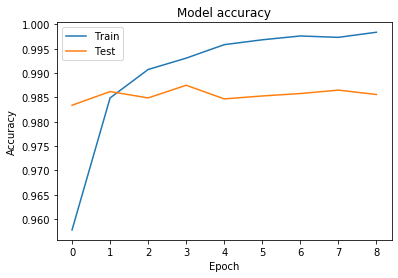

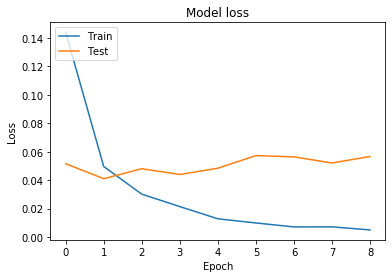

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

history = model.history.history

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
